In [99]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

%matplotlib inline

In [100]:
reviews = pd.read_csv(config.RAW_FILE_PATH / 'olist_order_reviews_dataset.csv')
payments = pd.read_csv(config.RAW_FILE_PATH / 'olist_order_payments_dataset.csv')
cus_data = pd.read_csv(config.RAW_FILE_PATH / 'olist_customers_dataset.csv')
order = pd.read_csv(config.RAW_FILE_PATH / 'olist_orders_dataset.csv')
order_items = pd.read_csv(config.RAW_FILE_PATH / 'olist_order_items_dataset.csv')
products = pd.read_csv(config.RAW_FILE_PATH / 'olist_products_dataset.csv')
sellers = pd.read_csv(config.RAW_FILE_PATH / 'olist_sellers_dataset.csv')


In [101]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [102]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [103]:
cus_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [104]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [105]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [106]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [107]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [108]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [109]:
datasets = [reviews, payments, cus_data, order, order_items, reviews, products]
names = ['reviews', 'payments', 'cus_data','order', 'order_items', 'reviews', 'products']

In [110]:
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
1,payments,103886,5,0,0,
2,cus_data,99441,5,0,0,
3,order,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,order_items,112650,7,0,0,
5,reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"


Exploratory Data Analysis

1. Review score on Olist

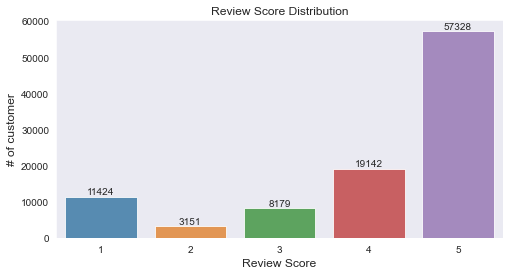

In [111]:
#Get the distribution of the ratings
x=reviews['review_score'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Review Score Distribution")
plt.ylabel('# of customer', fontsize=12)
plt.xlabel('Review Score', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
   height = rect.get_height()
   ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

2. Order Status

Looking at the dataset columns, we can see orders with different status and with different timestamp columns like purchase, approved, delivered and estimated delivery. First, let's look at the status of the orders we have in this dataset.

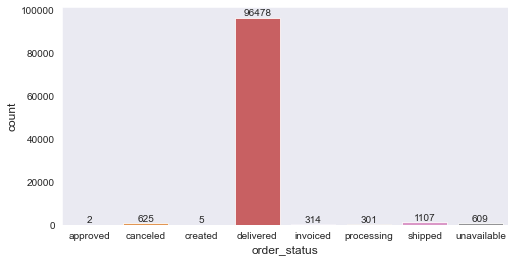

In [86]:
#Get the distribution of the order status
x=order['order_status'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("")
plt.ylabel('count', fontsize=12)
plt.xlabel('order_status', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
   height = rect.get_height()
   ax.text(rect.get_x() + rect.get_width()/2, height + 3, label, ha='center', va='bottom')

plt.show()


By the time this dataset was created, the highest amount of orders went from delivered ones. Only 3% of all orders came from the other status.

3. Top1 10 Average Price split by State


In [16]:
orders_detail = pd.merge(order_items,payments,on='order_id',how = 'inner')
orders_detail = orders_detail[['order_id','product_id','price','freight_value','payment_type','payment_value']]
orders_detail.head()

,order_id,product_id,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04


In [17]:
sellers_detail = pd.merge(order_items,sellers,on='seller_id',how = 'inner')
sellers_detail = sellers_detail[['seller_id','seller_state','price','freight_value']]
sellers_detail.head()

,seller_id,seller_state,price,freight_value
0,48436dade18ac8b2bce089ec2a041202,SP,58.9,13.29
1,48436dade18ac8b2bce089ec2a041202,SP,55.9,9.94
2,48436dade18ac8b2bce089ec2a041202,SP,132.9,20.17
3,48436dade18ac8b2bce089ec2a041202,SP,58.9,15.16
4,48436dade18ac8b2bce089ec2a041202,SP,139.9,16.74


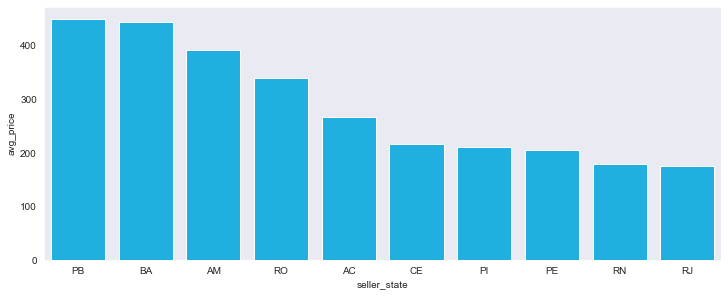

In [20]:
order_price = sellers_detail[['seller_id','price','seller_state']].groupby("seller_state").sum().sort_values(by='price',ascending = False)
order_count= sellers_detail[['seller_state','seller_id']].groupby("seller_state").count().sort_values(by='seller_id',ascending = False)
order_count.rename(columns={"seller_id":"count"},inplace = True)

order_count = pd.merge(order_price,order_count,on='seller_state',how = 'inner')
order_count['avg_price'] =order_count['price']/order_count['count']
order_count['total_sales'] = order_count['price']*order_count['count']
order_count = order_count.sort_values(by='avg_price', ascending = False).reset_index()

fig = plt.figure(constrained_layout=True, figsize=(10,4))
ax.set_title("Average Price by State", fontsize=10)
ax.tick_params(axis='x', rotation=90)
ax = sns.barplot(x='seller_state',y='avg_price',data=order_count.iloc[:10,:],color='deepskyblue')
plt.show()


4. Top 10 Total Payment Value split by State

For the next plots, let's dive into the real evolution of e-commerce in terms of purchase orders.

In [115]:
order_items = data_overview.merge(orders_detail, how='left', on='order_id')
order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year_month,product_id,price,freight_value,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12


In [116]:
data_regions = order_items.groupby(by=['order_purchase_year_month', 'customer_state'], as_index=False)
data_regions = data_regions.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
data_regions.columns = ['month', 'region', 'order_count', 'order_amount']
data_regions.reset_index(drop=True, inplace=True)

state_group = order_items.groupby(by='customer_state', 
                                       as_index=False).count().loc[:, ['customer_state', 'order_id']]
state_group = order_items.sort_values(by='order_id', ascending=False).reset_index(drop=True)
state_group = order_items.iloc[:10, :]

<AxesSubplot:xlabel='total_payment_value', ylabel='customer_state'>

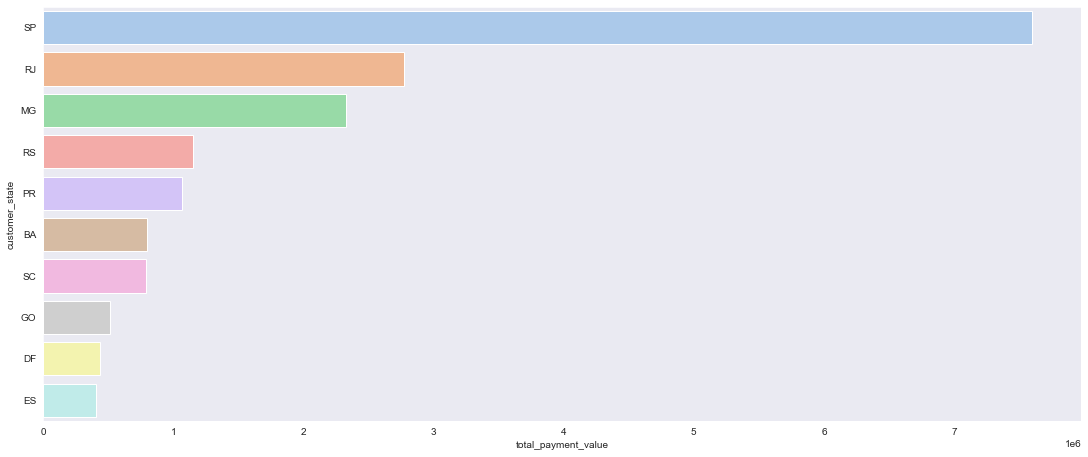

In [117]:
payment_value_state = order_items[['customer_state','payment_value']].groupby("customer_state").sum().sort_values(by='payment_value',ascending = False)
payment_value_state = payment_value_state.iloc[:10,:].reset_index()
payment_value_state.rename(columns={"payment_value":"total_payment_value"},inplace = True)
payment_value_state

fig = plt.figure(constrained_layout=True, figsize=(15, 12))
gs = GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[1, :])
sns.barplot(x='total_payment_value', y='customer_state', data=payment_value_state, ax=ax, palette='pastel')

5. Payment Types Split by Months

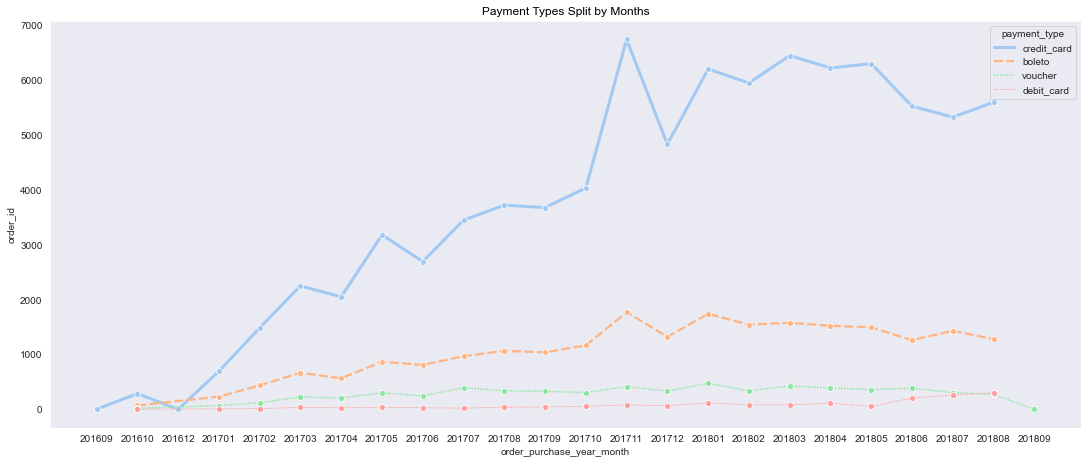

In [118]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[1, :])

payment_chage = order_items.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_chage = payment_chage.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_chage = payment_chage.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax1, hue='payment_type',
             style='payment_type', size='payment_type', marker='o', palette='pastel')
ax1.set_title('Payment Types Split by Months', size=12, color='black')
plt.show()


6. Top 10 Freight Value split by State

<AxesSubplot:xlabel='total_freight_value', ylabel='customer_state'>

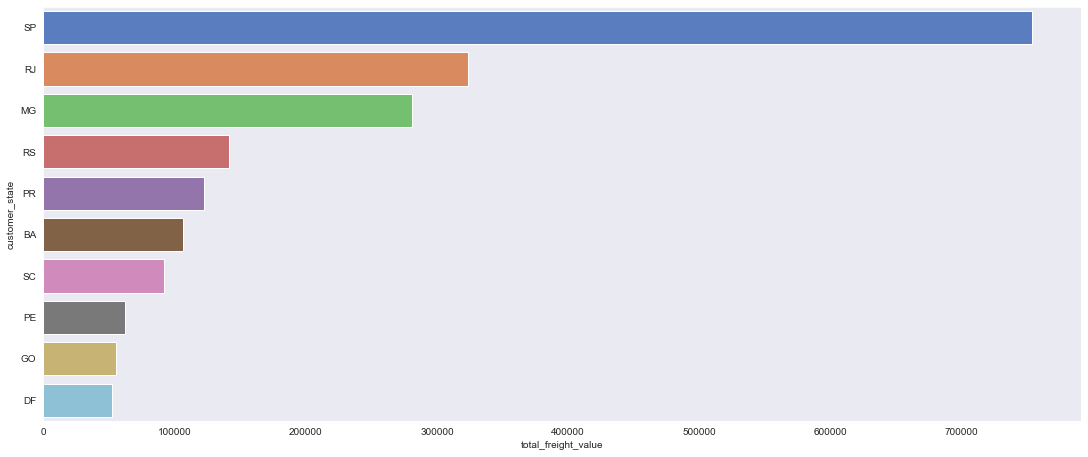

In [120]:

freight_value_state = order_items[['customer_state','freight_value']].groupby("customer_state").sum().sort_values(by='freight_value',ascending = False)
freight_value_state = freight_value_state.iloc[:10,:].reset_index()
freight_value_state.rename(columns={"freight_value":"total_freight_value"},inplace = True)
freight_value_state

fig = plt.figure(constrained_layout=True, figsize=(15, 12))
gs = GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[1, :])

sns.barplot(x='total_freight_value', y='customer_state', data=price_spiltby_state, ax=ax, palette='muted')

7. Top 10 Total Value split by State

<AxesSubplot:xlabel='total_price', ylabel='customer_state'>

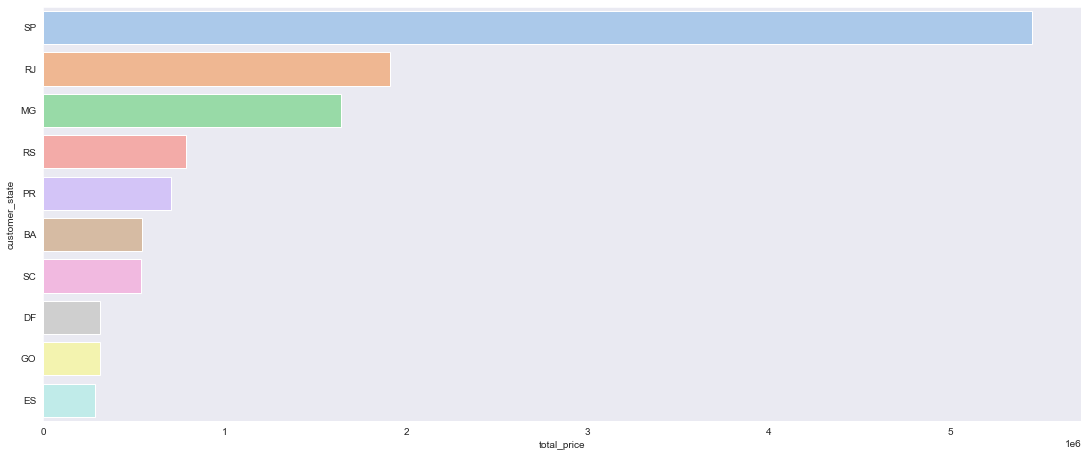

In [121]:
price_spiltby_state = order_items[['customer_state','price']].groupby("customer_state").sum().sort_values(by='price',ascending = False)
price_spiltby_state = price_spiltby_state.iloc[:10,:].reset_index()
price_spiltby_state.rename(columns={"price":"total_price"},inplace = True)
price_spiltby_state

fig = plt.figure(constrained_layout=True, figsize=(15, 12))
gs = GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[1, :])
sns.barplot(x='total_price', y='customer_state', data=price_spiltby_state, ax=ax, palette='pastel')

8. Total Orders Split By Month

In [122]:
data_overview = order.merge(cus_data, how='left', on='customer_id')
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    data_overview[col] = pd.to_datetime(data_overview[col])

data_overview['order_purchase_year_month'] = data_overview['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
data_overview.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,201711
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,201802


Text(0.5, 1.0, 'Total Orders Split By Month')

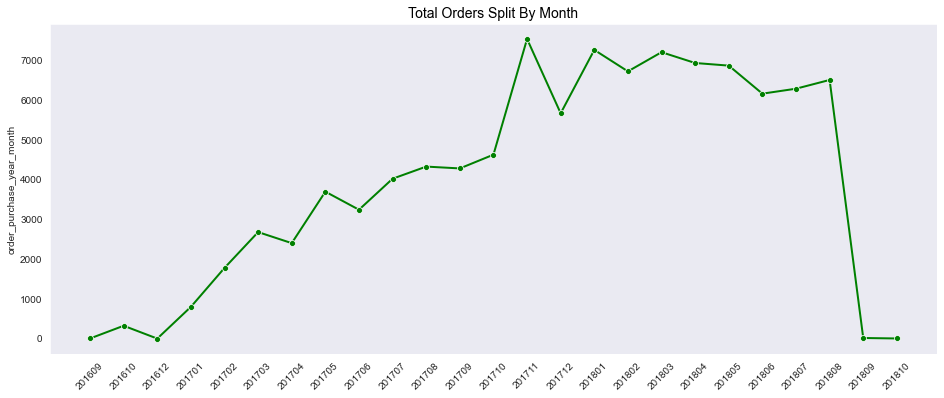

In [123]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])


sns.lineplot(data=data_overview['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='g', linewidth=2, marker='o')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Total Orders Split By Month', size=14, color='black')